In [5]:
# Sumowanie liczb pojedynczej precyzji
import numpy as np
from matplotlib import pyplot as plt
import time

In [6]:
# CONSTANTS, you can modify the x value
x = np.float32(0.53125)
NUMBERS = [x] * 10 ** 7
EXPECTED_VALUE = x * 10 ** 7

In [7]:
def relative_error(x, dx):
    return abs((x - dx)) / x


def absolute_error(x, dx):
    return abs(x - dx)

In [8]:
def sum_normal(array):
    counter = np.float32(0)
    for i in array:
        counter += i
    return counter


def sum_tree(array):
    if (len(array) == 1):
        return array[0]

    len_ = int(len(array) / 2)
    return sum_tree(array[0:len_]) + sum_tree(array[len_:])

def kahan_sum(array):
    sum = np.float32(0)
    err = np.float32(0)
    for i in array:
        y = np.float32(i - err)
        temp = np.float32(sum + y)
        err = (temp - sum) - y
        sum = temp
    return sum

In [9]:
# Display plot function
def draw_relative_error_plot(numbers):
    counter = np.float32(0)
    array = []
    for (j, i) in enumerate(numbers):
        counter = counter + i
        if j % 25000 == 0 and j != 0:
            array.append(relative_error(j * x, counter))
    plt.plot(array)
    plt.show()

In [10]:
def print_errors():
    tree_sum = sum_tree(NUMBERS)

    rel_err_tree = relative_error(EXPECTED_VALUE, tree_sum)
    abs_err_tree = absolute_error(EXPECTED_VALUE, tree_sum)
    print("Tree sum: ")
    print(f"Relative error: {rel_err_tree}")
    print(f"Absolute error: {abs_err_tree}")
    print("--------------")
    normal_sum = sum_normal(NUMBERS)
    rel_err_normal = relative_error(EXPECTED_VALUE, normal_sum)
    abs_err_normal = absolute_error(EXPECTED_VALUE, normal_sum)
    print("Normal sum: ")
    print(f"Relative error: {rel_err_normal}")
    print(f"Absolute error: {abs_err_normal}")
    print("--------------")
    kahan = kahan_sum(NUMBERS)
    rel_err_kahan = relative_error(EXPECTED_VALUE, kahan)
    abs_err_kahan = absolute_error(EXPECTED_VALUE, kahan)
    print("Kahan sum: ")
    print(f"Relative error: {rel_err_kahan}")
    print(f"Absolute error: {abs_err_kahan}")

In [11]:
def compare_time():
    start = time.time() * 1000
    sum_normal(NUMBERS)
    end = time.time() * 1000
    normal_time = (end - start).__round__(2)
    print(f"Time for normal sum: {normal_time} milliseconds")
    start = time.time() * 1000
    sum_tree(NUMBERS)
    end = time.time() * 1000
    tree_time = (end - start).__round__(2)
    print(f"Time for tree sum: {tree_time} milliseconds")
    start = time.time() * 1000
    kahan_sum(NUMBERS)
    end = time.time() * 1000
    tree_time = (end - start).__round__(2)
    print(f"Time for Kahan sum: {tree_time} milliseconds")


In [14]:
print_errors()

Tree sum: 
Relative error: 0.0
Absolute error: 0.0
--------------
Normal sum: 
Relative error: 0.05301825882352941
Absolute error: 281659.5
--------------
Kahan sum: 
Relative error: 0.0
Absolute error: 0.0


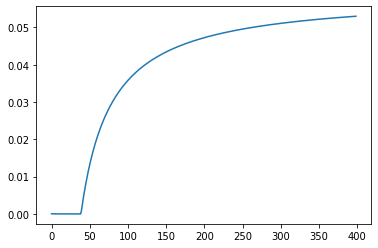

In [13]:
draw_relative_error_plot(NUMBERS)

In [15]:
compare_time()

Time for normal sum: 533.03 milliseconds
Time for tree sum: 7647.96 milliseconds
Time for Kahan sum: 9437.04 milliseconds


In [16]:
def riemann(s, n, func):
    counter = func(0)
    for k in range(1, n + 1):
        counter += func(1 / (k ** s))
    reversed_counter = func(0)
    for k in range(n, 0, -1):
        reversed_counter += func(1 / (k ** s))
    return (reversed_counter, counter)


def dirichlet(s, n, func):
    counter = func(0)
    for k in range(1, n + 1):
        counter += func((-1) ** (k - 1) * 1 / (k ** s))
    reversed_counter = func(0)
    for k in range(n, 0, -1):
        reversed_counter += func((-1) ** (k - 1) * 1 / (k ** s))
    return (reversed_counter, counter)

In [17]:
def compare_precision():
    for s in [2, 3.6667, 5, 7.2, 10]:
        for n in [50, 100, 200, 500, 1000]:
            print(f"s = {s}, n = {n}")
            (reversed_counter_r_32, counter_r_32) = riemann(s, n, np.float32)
            (reversed_counter_r_64, counter_r_64) = riemann(s, n, np.float64)
            (reversed_counter_d_32, counter_d_32) = dirichlet(s, n, np.float32)
            (reversed_counter_d_64, counter_d_64) = dirichlet(s, n, np.float64)
            print("Riemann - float32")
            print(f"Normal counter: {counter_r_32}")
            print(f"Reversed counter: {reversed_counter_r_32}")
            print(f"Difference: {abs(reversed_counter_r_32 - counter_r_32)}")
            print("\n")
            print("Riemann - float64")
            print(f"Normal counter: {counter_r_64}")
            print(f"Reversed counter: {reversed_counter_r_64}")
            print(f"Difference: {abs(reversed_counter_r_64 - counter_r_64)}")
            print("\n")
            print("Dirichlet - float32")
            print(f"Normal counter: {counter_d_32}")
            print(f"Reversed counter: {reversed_counter_d_32}")
            print(f"Difference: {abs(reversed_counter_d_32 - counter_d_32)}")
            print("\n")
            print("Dirichlet - float64")
            print(f"Normal counter: {counter_d_64}")
            print(f"Reversed counter: {reversed_counter_d_64}")
            print(f"Difference: {abs(reversed_counter_d_64 - counter_d_64)}")
            print("\n")
            print("-----------------------------------------------------")

In [18]:
def riemann_draw(s, n, func):
    counter = func(0)
    array = []
    array2 = []
    for k in range(1, n + 1):
        counter += func(1 / (k ** s))
        x1 = 1 / (k ** s)
        y = 1 / ((k + 1) ** s)
        z = 1 / ((k + 2) ** s)
        array.append(relative_error(x1 + y + z, func(func(x1 + y) + z)))
        array2.append(relative_error(x1 + y + z, func(x1 + func(y + z))))
    draw_plot(array)
    draw_plot(array2)


def dirichlet_draw(s, n, func):
    counter = func(0)
    array = []
    array2 = []
    for k in range(1, n + 1):
        counter += func((-1) ** (k - 1) * 1 / (k ** s))
        x1 = (-1) ** (k - 1) * 1 / (k ** s)
        y = (-1) ** ((k + 1) - 1) * 1 / ((k + 1) ** s)
        z = (-1) ** ((k + 2) - 1) * 1 / ((k + 2) ** s)
        array.append(relative_error(x1 + y + z, func(func(x1 + y) + z)))
        array2.append(relative_error(x1 + y + z, func(x1 + func(y + z))))
    draw_plot(array)
    draw_plot(array2)

In [19]:
def draw_plot(arr):
    plt.plot(arr)
    plt.show()

In [20]:
compare_precision()

s = 2, n = 50
Riemann - float32
Normal counter: 1.6251329183578491
Reversed counter: 1.62513267993927
Difference: 2.384185791015625e-07


Riemann - float64
Normal counter: 1.625132733621529
Reversed counter: 1.6251327336215293
Difference: 2.220446049250313e-16


Dirichlet - float32
Normal counter: 0.8222709894180298
Reversed counter: 0.8222710490226746
Difference: 5.960464477539063e-08


Dirichlet - float64
Normal counter: 0.8222710318260295
Reversed counter: 0.8222710318260289
Difference: 5.551115123125783e-16


-----------------------------------------------------
s = 2, n = 100
Riemann - float32
Normal counter: 1.634984016418457
Reversed counter: 1.6349838972091675
Difference: 1.1920928955078125e-07


Riemann - float64
Normal counter: 1.6349839001848923
Reversed counter: 1.634983900184893
Difference: 6.661338147750939e-16


Dirichlet - float32
Normal counter: 0.8224174976348877
Reversed counter: 0.8224174976348877
Difference: 0.0


Dirichlet - float64
Normal counter: 0.8224175333741

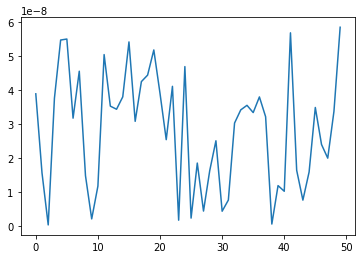

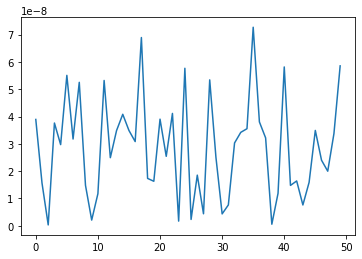

In [22]:
riemann_draw(2, 50, np.float32)

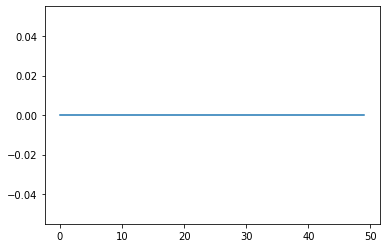

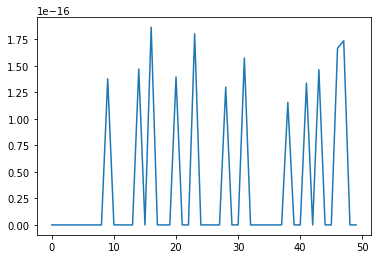

In [23]:
riemann_draw(2, 50, np.float64)

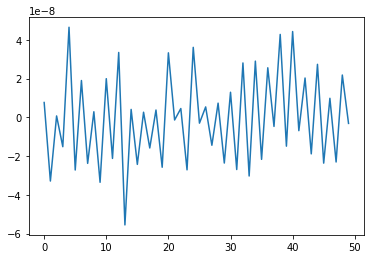

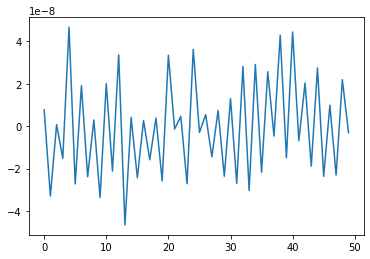

In [24]:
dirichlet_draw(2, 50, np.float32)

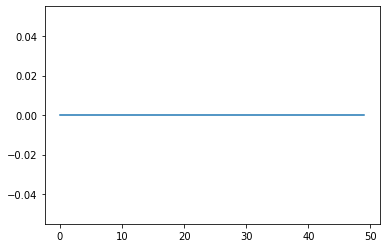

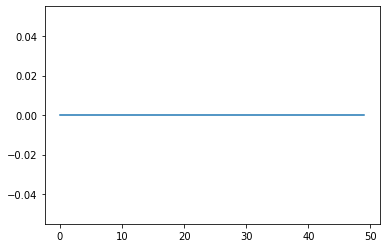

In [25]:
dirichlet_draw(2, 50, np.float64)

In [27]:
def logistic_eq(r, x):
    return r * x * (1 - x)

In [28]:
def bifurcation_diagram(seed, n_skip, n_iter, func=np.float32, step=0.0001, r_min=1, r_max=4):
    print("Starting with x0 seed {0}, skip plotting first {1} iterations, then plot next {2} iterations.".format(seed,
                                                                                                                 n_skip,
                                                                                                                 n_iter));
    R = []

    X = []

    r_range = np.linspace(r_min, r_max, int(1 / step))

    for r in r_range:
        x = seed;

        for i in range(n_iter + n_skip + 1):
            if i >= n_skip:
                R.append(func(r))
                X.append(func(x))

            x = func(logistic_eq(r, x));

    plt.plot(R, X, ls='', marker='.', markersize=2)
    plt.ylim(0, 1)
    plt.xlim(r_min, r_max)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()

Starting with x0 seed 0.2, skip plotting first 10 iterations, then plot next 10 iterations.


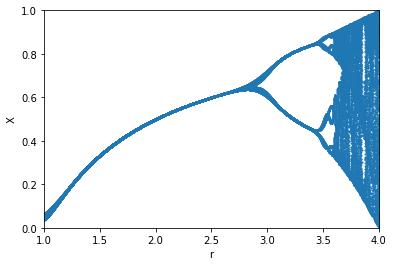

Starting with x0 seed 0.5, skip plotting first 10 iterations, then plot next 10 iterations.


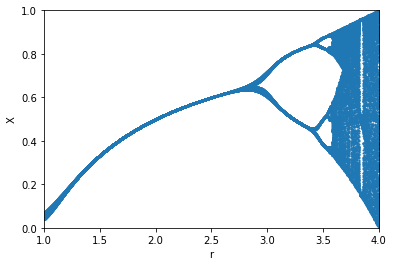

Starting with x0 seed 0.7, skip plotting first 10 iterations, then plot next 10 iterations.


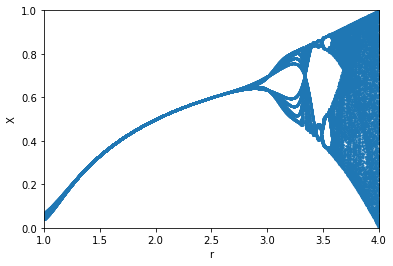

In [31]:
bifurcation_diagram(0.2, 10, 10)
bifurcation_diagram(0.5, 10, 10)
bifurcation_diagram(0.7, 10, 10)

Starting with x0 seed 0.5, skip plotting first 100 iterations, then plot next 10 iterations.


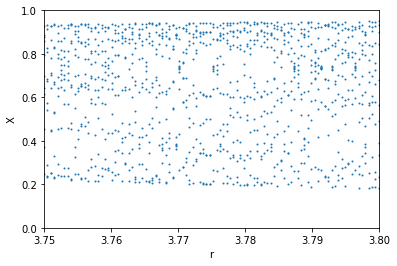

Starting with x0 seed 0.5, skip plotting first 100 iterations, then plot next 10 iterations.


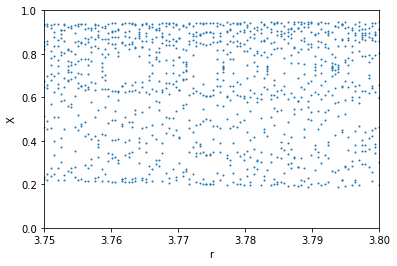

In [32]:
bifurcation_diagram(0.5, 100, 10,np.float32, r_min=3.75, r_max= 3.80,step= 0.01)
bifurcation_diagram(0.5, 100, 10,np.float64, r_min=3.75, r_max= 3.80,step= 0.01)

In [33]:
def count_of_iterations():
    r = 4
    n = 10000
    eps = 1e-5
    x_range = np.linspace(0, 1, int(1 / 0.001))
    results = []
    for x in x_range:
        x_tab = [np.float32(x)]
        r = np.float32(r)
        i = 0
        while x_tab[i] > eps and i < n:
            x_tab.append(r * x_tab[i] * (1 - x_tab[i]))
            i += 1
        results.append(i)
    plt.plot(x_range, results, '.', markersize=2)
    plt.show()

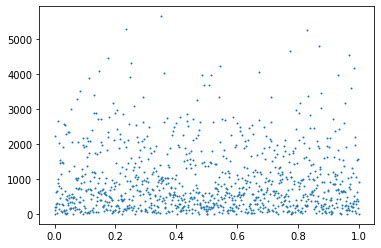

In [34]:
count_of_iterations()